# Run on google colab

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=bd5194d06174ee4f1a56e3979383de05af501325347cb02f307ccaa4512fc205
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


# Import Common Package

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import wget
import zipfile
from tqdm import tqdm
import os

# Download dataset

In [ ]:
if os.path.isfile('rockpaperscissors.zip'):
    print("File Sudah ada")
else:
    wget.download(
        url='https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
    )
    print("\nDownload Selesai")


Download Selesai


# Extract File Zip

In [ ]:
import shutil
import copy

In [ ]:
if os.path.exists('rockpaperscissors/'):
    print("File Sudah di extract")
else:
    with zipfile.ZipFile('rockpaperscissors.zip', mode='r') as zip_file:
        for zf in tqdm(zip_file.infolist(), desc="Extracting"):
            try:
                zip_file.extract(zf)                
            except Exception as e:
                print(e)
    zip_file.close()
    shutil.rmtree('__MACOSX/')
    print("Proses extract berhasil")

Extracting: 100%|██████████| 8765/8765 [00:05<00:00, 1710.41it/s]


Proses extract berhasil


In [ ]:
shutil.rmtree('/content/rockpaperscissors/rps-cv-images')
os.remove('/content/rockpaperscissors/README_rpc-cv-images.txt')

# Simple EDA

In [ ]:
path = 'rockpaperscissors/'
path_dict = {}
for i in os.listdir(path):
    path_dict[i] = os.listdir(os.path.join(path, i))
    print(i, "=> sebanyak ", len(os.listdir(os.path.join(path, i))))

rock => sebanyak  726
scissors => sebanyak  750
paper => sebanyak  712


In [ ]:
import matplotlib.pyplot as plt


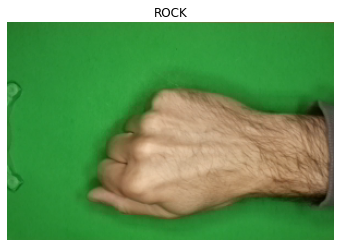

In [ ]:
classes = os.listdir(path)
idx_classes = np.random.randint(0, len(classes))
values = os.listdir(os.path.join(path, classes[idx_classes]))
idx_values = np.random.randint(0,50)
new_path = os.path.join(path, classes[idx_classes])
img = plt.imread(os.path.join(new_path, values[idx_values]))
plt.imshow(img)
plt.title(classes[idx_classes].upper())
plt.axis(False)
plt.show()

In [ ]:
os.path.join(path,'train')

'rockpaperscissors/train'

# create function to split data

In [ ]:
def split_data(data, train_size=0.8, random_seed=42):

    """Fungsi ini untuk memisahkan data menjadi train set dan validation_set
    dengan urutan hasil return : data_train, data_validasi"""
    np.random.seed(int(random_seed))
    test_size=1-train_size
    panjang_train = int(train_size*len(data))
    panjang_val = int(test_size*len(data))
    selisih =len(data) - (panjang_train + panjang_val)
    # print(len(data), " - ( ",panjang_train, " + ", panjang_val," ) = ",selisih)
    if selisih > 0:
        panjang_train +=selisih
    
    data_train = []
    #memilih data train dari data
    while len(data_train) != panjang_train:
        bantu = np.random.randint(0, (len(data)-1))
        if data[bantu] not in data_train:
            data_train.append(data[bantu])
            del data[bantu]
     
    #Sisanya Dicopy kedalam Train
    data_validasi = data.copy()
    del data
     
    print("\nPanjang train : ",panjang_train)
    print("Panjang validasi : ",panjang_val,"\n")
    return data_train, data_validasi

# create function to move data

In [ ]:
#Selanjutnya pindahkan ke folder terpisah

#Membuat fungsi untuk membuat folder penyimpanan dan memindahkan data yang telah dipisahkan kedalam folder tersebut
def move(data_train, data_val, data_path, train_path, val_path):
    import shutil
    """Fungsi ini untuk membuat folder penyimpanan dan 
    memasukan data yang telah dipisahkan dengan folder tersebut"""
    
    #Memeriksa apakan folder sudah ada, jika belum maka tambahkan folder
    if not (os.path.exists(train_path) and os.path.exists(val_path)):
        os.makedirs(train_path)
        os.makedirs(val_path)
    else:
        print('Folder Sudah ada')
    
    #memindahkan ke folder terpisah
    for i in range(len(data_train)):
        shutil.move(os.path.join(data_path, data_train[i]), os.path.join(train_path, data_train[i]))
    
    #memindahkan ke folder terpisah
    for i in range(len(data_val)):
        shutil.move(os.path.join(data_path, data_val[i]), os.path.join(val_path, data_val[i]))

# Create function to split and remove data

In [ ]:
def split_and_move_data(path='', random_seed=42, train_size=0.8):
    path_dict = {}
    for i in os.listdir(path):
        path_dict[i] = os.listdir(os.path.join(path, i))
        print(i, "=> sebanyak ", len(os.listdir(os.path.join(path, i))))
      
    dict_train_test = {}
    for cls in path_dict.keys():
        dict_train_test[cls] = split_data(path_dict[cls],random_seed=random_seed,train_size=train_size)
     
    for cls in path_dict.keys():
        move(
           data_train =  dict_train_test[cls][0],
           data_val = dict_train_test[cls][1],
           data_path = os.path.join(path, cls),
           train_path = os.path.join(os.path.join(path,'train'),cls),
           val_path = os.path.join(os.path.join(path,'test'),cls)
        )
        shutil.rmtree(os.path.join(path, cls))
    len_train = 0
    len_test = 0
    train = os.path.join(path,'train')
    test = os.path.join(path,'test')
    for cls in os.listdir(train):
        len_train += len(os.listdir((os.path.join(train,cls))))
        len_test += len(os.listdir((os.path.join(test,cls))))
         
     
    print('train : {} data'.format(len_train))
    print('test  : {} data'.format(len_test))      

### Split and move data 
`so that the folder structure becomes :`
```folder
    test
        class_1
        class_2
        .
        .
        class_n
    train
        class_1
        class_2
        .
        .
        class_n
```

In [ ]:
split_and_move_data('rockpaperscissors/', train_size=0.6)

rock => sebanyak  726
scissors => sebanyak  750
paper => sebanyak  712

Panjang train :  436
Panjang validasi :  290 


Panjang train :  450
Panjang validasi :  300 


Panjang train :  428
Panjang validasi :  284 

train : 1314 data
test  : 874 data


In [ ]:
from tensorflow import keras

# Modeling

In [ ]:
train_dir = os.path.join('rockpaperscissors/train')
val_dir = os.path.join('rockpaperscissors/test')
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    rotation_range=90,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest') # set validation split
val_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,    
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    seed=42) # set as training data
validation_generator = val_datagen.flow_from_directory(
    val_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    seed=42)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    #Output layer
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time
callback=EarlyStopping(monitor="val_loss",patience=20, verbose=1, mode='min')
check_point = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
start = time.time()
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=100,
                              verbose=1,
                              callbacks=[callback, check_point])
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/100
42/42 [==============================] - 44s 317ms/step - loss: 1.1072 - accuracy: 0.3333 - val_loss: 1.0916 - val_accuracy: 0.3352

Epoch 00001: val_accuracy improved from -inf to 0.33524, saving model to best_model.h5
Epoch 2/100
42/42 [==============================] - 13s 311ms/step - loss: 1.0783 - accuracy: 0.4079 - val_loss: 1.0874 - val_accuracy: 0.3547

Epoch 00002: val_accuracy improved from 0.33524 to 0.35469, saving model to best_model.h5
Epoch 3/100
42/42 [==============================] - 13s 307ms/step - loss: 0.9514 - accuracy: 0.5350 - val_loss: 0.9295 - val_accuracy: 0.4966

Epoch 00003: val_accuracy improved from 0.35469 to 0.49657, saving model to best_model.h5
Epoch 4/100
42/42 [==============================] - 13s 309ms/step - loss: 1.0005 - accuracy: 0.5000 - val_loss: 0.8560 - val_accuracy: 0.5961

Epoch 00004: val_accuracy improved from 0.49657 to 0.59611, saving model to best_model.h5
Epoch 5/100
42/42 [==============================] - 13s 309ms/

In [ ]:
from tensorflow.keras.models import load_model
# load model 2 untuk digunakan lagi dari file
best_model = load_model('best_model.h5')

loss, acc = best_model.evaluate_generator(validation_generator, verbose=1)
print('Test Accuracy_model_3: %.3f' % acc)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


28/28 [==============================] - 3s 87ms/step - loss: 0.2608 - accuracy: 0.9073
Test Accuracy_model_3: 0.907


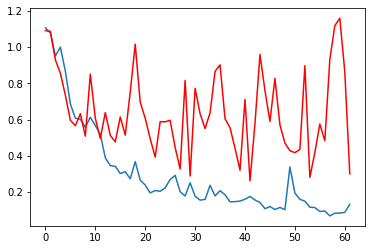

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], c='r')
plt.show()

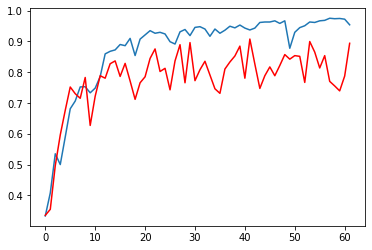

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], c='r')
plt.show()

`Tidak terlalu overfit`

In [ ]:
!pip install gdown

In [ ]:
import gdown

In [ ]:
if os.path.isfile('archive.zip'):
    print("File Sudah ada")
else:
    url = "https://drive.google.com/uc?export=download&id=1fB-z8DY8emOG9lIwanCL-UxTXSFEKw9M"
    output = "archive.zip"
    gdown.download(url, output, False)
    print("\nDownload Selesai")

Downloading...
From: https://drive.google.com/uc?export=download&id=1fB-z8DY8emOG9lIwanCL-UxTXSFEKw9M
To: /content/archive.zip
100%|██████████| 920k/920k [00:00<00:00, 58.7MB/s]


Download Selesai


In [ ]:
if os.path.exists('testing/'):
    print("File Sudah di extract")
else:
    with zipfile.ZipFile('archive.zip', mode='r') as zip_file:
        for zf in tqdm(zip_file.infolist(), desc="Extracting"):
            try:
                zip_file.extract(zf)                
            except Exception as e:
                print(e)
    zip_file.close()
    print("Proses extract berhasil")

Extracting: 100%|██████████| 16/16 [00:00<00:00, 907.78it/s]

Proses extract berhasil


In [ ]:
from skimage.transform import resize, rescale
from skimage.color import rgba2rgb

In [251]:
def predict(path, figure=0, from_upload=False):
    classes_name = list(train_generator.class_indices.keys())
    img = plt.imread(path)
    if img.shape[2] == 4:
        img = rgba2rgb(img)
    img = resize(img, output_shape=(150,150))
    plt.figure(figure, figsize=(12,5))
    plt.imshow(img)
    plt.axis(False)
    img = np.expand_dims(img, axis=0)
    pred = classes_name[np.argmax(model.predict(img))]
    if from_upload:
        label=""
        font = {"color": 'navy'}
        plt.title("Prediction : {}".format(pred), fontdict=font) 
    else:
        if 'content' in path:
            label = path.split('/')[4]
        else:
            label = path.split('/')[2]
            
        if label not in classes_name:
            label = path.split('/')[3]
        font = {"color": 'r'} if label != pred else {"color": 'g'}
        plt.title("reality : {}   ||   Prediction : {}".format(label, pred), fontdict=font)  
    plt.show()

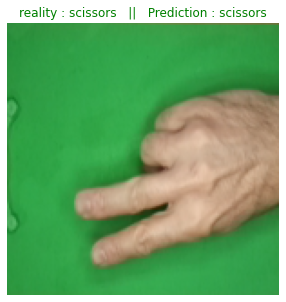

In [252]:
predict('rockpaperscissors/test/scissors/0657zSfiTYzP2jrl.png')

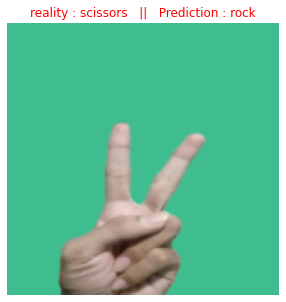

In [253]:
predict('/content/testing/scissors/gunting 2.png')

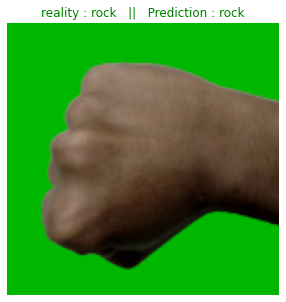

In [254]:
predict('/content/testing/rock/batu 3.png')

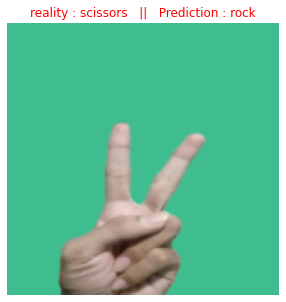

In [255]:
predict('/content/testing/scissors/gunting 2.png')

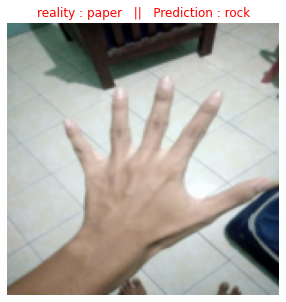

In [256]:
predict('/content/testing/paper/kertas 3.jpeg')

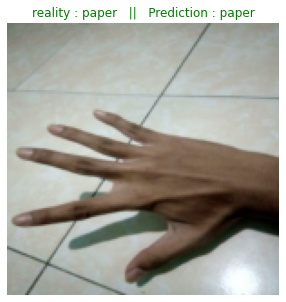

In [257]:
predict('/content/testing/paper/kertas 1.jpeg')

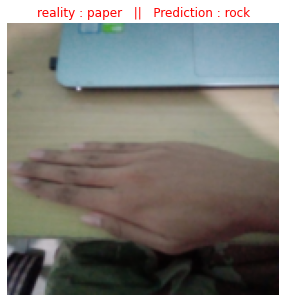

In [258]:
predict('/content/testing/paper/Kertas 2.jpeg')

`dari data tambahan yang saya buat sendiri hanya benar 2`

In [259]:
#Melakukan Prediksi
from google.colab import files

In [260]:
unggahan = files.upload()

Saving gunting 6.png to gunting 6.png


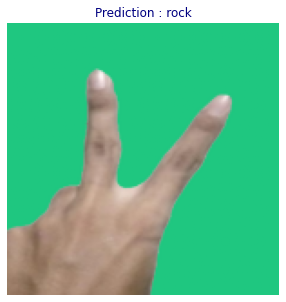

In [261]:
for i,path in enumerate(unggahan.keys()):
    predict(path, figure=i, from_upload=True)

Saving gunting 5.png to gunting 5 (4).png


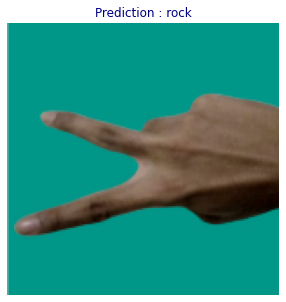

In [262]:
unggahan = files.upload()
for i,path in enumerate(unggahan.keys()):
    predict(path, figure=i, from_upload=True)

Saving batu 3.png to batu 3 (1).png
Saving batu 5.png to batu 5 (1).png
Saving batu 6.png to batu 6 (1).png
Saving batu 9.png to batu 9 (2).png
Saving batu 11.png to batu 11 (1).png


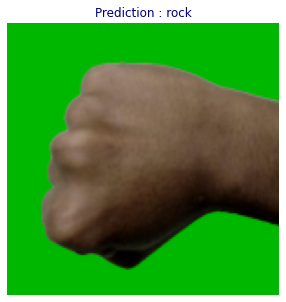

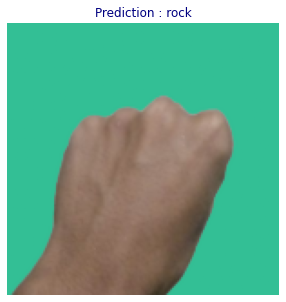

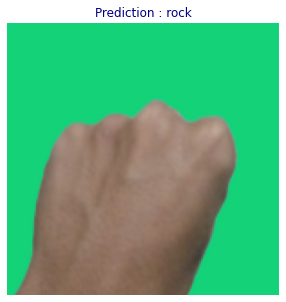

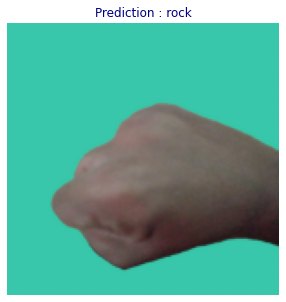

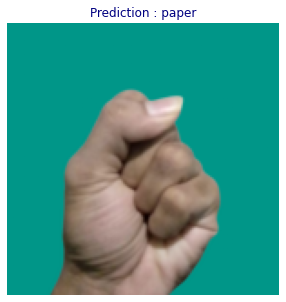

In [263]:
unggahan = files.upload()
for i,path in enumerate(unggahan.keys()):
    predict(path, figure=i, from_upload=True)

`Prediksi cenderung ke batu`

`Nama : Ahmad Habib Husaini` <br>
`Asal : Bekasi`